<a href="https://colab.research.google.com/github/Aspire-Mayank/EVA/blob/master/Session16/Assignment/Session_16_DenseNets_TFrecords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraies

In [1]:
!nvidia-smi

Sun Dec 15 20:05:14 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras import backend as K
import numpy as np
% matplotlib inline 
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Input, Activation, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Add, Concatenate
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint, Callback
from tensorflow.keras import utils
from tensorflow.python.keras.utils import data_utils
import time

In [0]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

Hyperparameters

In [0]:
# Hyperparameters
batch_size = 128
num_classes = 10
epochs = 50
l = 8
num_filter = 16
compression = 0.9
dropout_rate = 0.1

Clone API

In [6]:
!pip install --upgrade git+https://github.com/Aspire-Mayank/tf_utils

  Cloning https://github.com/Aspire-Mayank/tf_utils to /tmp/pip-req-build-wr5_rb16
  Running command git clone -q https://github.com/Aspire-Mayank/tf_utils /tmp/pip-req-build-wr5_rb16
  Created wheel for tf-utils: filename=tf_utils-0.2-cp36-none-any.whl size=10189 sha256=70b87ba6cdb5d1e031de8ea561ca162ac846fc59657683506271d53ebf6c8b1c
  Stored in directory: /tmp/pip-ephem-wheel-cache-4d5993f2/wheels/c6/a1/f5/e65a13dcac0c3aa5ee3096c6000024b61bc87fb782670e4035
Successfully built tf-utils


In [8]:
!pip install tensorflow-addons

     |████████████████████████████████| 1.8MB 39.7MB/s 
     |████████████████████████████████| 380.8MB 42kB/s 
     |████████████████████████████████| 3.8MB 36.6MB/s 
     |████████████████████████████████| 450kB 44.7MB/s 
     |████████████████████████████████| 81kB 11.1MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.8.2 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      S

In [1]:
import tf_utils.data as ds

Finished 'get_cpu_num' in 0.0000 secs


In [2]:
 ds.batch_size=128

 ds.get_cifar10_and_create_tfrecords()


Finished 'download_file' in 15.0370 secs
Finished 'download_cifar10_files' in 15.0378 secs
Done
Finished 'extract_cifar10_files' in 1.5814 secs
Finished '_get_file_names' in 0.0000 secs
Generating ./train.tfrecords
Finished 'read_pickle_from_file' in 0.1363 secs
Finished 'read_pickle_from_file' in 0.1224 secs
Finished 'read_pickle_from_file' in 0.1101 secs
Finished 'read_pickle_from_file' in 0.1118 secs
Finished 'read_pickle_from_file' in 0.1076 secs
Finished 'convert_to_tfrecord' in 2.3289 secs
Done!
Generating ./eval.tfrecords
Finished 'read_pickle_from_file' in 0.1261 secs
Finished 'convert_to_tfrecord' in 0.4633 secs
Done!
Finished 'create_tf_records' in 2.7931 secs
Finished 'get_cifar10_and_create_tfrecords' in 19.4127 secs


Read and Write TFRecord

In [3]:
train_ds=ds.get_train_ds()

test_ds=ds.get_eval_ds()

distorting image
Finished 'get_tf_dataset' in 2.1625 secs
Finished 'get_tf_dataset_in_batches' in 2.1627 secs
Finished 'get_train_ds' in 2.1630 secs
Finished 'get_tf_dataset' in 0.1197 secs
Finished 'get_tf_dataset_in_batches' in 0.1198 secs
Finished 'get_eval_ds' in 0.1201 secs


In [0]:
# Load CIFAR10 Data
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]
#STEPS_PER_EPOCH = len(x_train) // batch_size
#VALIDATION_STEPS = len(x_test) // batch_size

In [0]:
# train_mean = np.mean(x_train, axis=(0,1,2))
# train_std = np.std(x_train, axis=(0,1,2))

# test_mean = np.mean(x_train, axis=(0,1,2))
# test_std = np.std(x_train, axis=(0,1,2))

# normalize = lambda x: ((x - train_mean) / train_std).astype('float32')
# normalize_test = lambda x: ((x - test_mean) / test_std).astype('float32')

# x_train = normalize(x_train)
# x_test = normalize(x_test)

# # convert to one hot encoing 
# y_train = utils.to_categorical(y_train, num_classes)
# y_test = utils.to_categorical(y_test, num_classes)

In [0]:
#convert_to_tfrecord_data(x_train,y_train, './train.tfrecord')
#convert_to_tfrecord_data(x_test,y_test, './test.tfrecord')

In [0]:
#x_trainTF, y_trainTF = create_dataset('./train.tfrecord')
#x_testTF, y_testTF = create_dataset('./test.tfrecord')

Functions for Post Training Analysis

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    val_acc = model_history.history['val_acc']
    acc = model_history.history['acc']

    axs[0].plot(range(1,len(acc)+1),acc)
    axs[0].plot(range(1,len(val_acc)+1),val_acc)
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(acc)+1),len(acc)/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']

    axs[1].plot(range(1,len(loss)+1),loss)
    axs[1].plot(range(1,len(val_loss)+1),val_loss)
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(loss)+1),len(loss)/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_ds, model):
    result = model.predict(test_ds)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_ds, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

Model

In [0]:
# Dense Block
def add_denseblock(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    temp = input
    for _ in range(l):
        BatchNorm = BatchNormalization()(temp)
        relu = Activation('relu')(BatchNorm)
        Conv2D_3_3 = Conv2D(int(num_filter*compression), (3,3), use_bias=False ,padding='same')(relu)
        if dropout_rate>0:
          Conv2D_3_3 = Dropout(dropout_rate)(Conv2D_3_3)
        concat = Concatenate(axis=-1)([temp,Conv2D_3_3])
        
        temp = concat
        
    return temp

In [0]:
def add_transition(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    BatchNorm = BatchNormalization()(input)
    relu = Activation('relu')(BatchNorm)
    Conv2D_BottleNeck = Conv2D(int(num_filter*compression), (1,1), use_bias=False ,padding='same')(relu)
    if dropout_rate>0:
      Conv2D_BottleNeck = Dropout(dropout_rate)(Conv2D_BottleNeck)
    avg = AveragePooling2D(pool_size=(2,2))(Conv2D_BottleNeck)
    
    return avg

In [0]:
def output_layer(input):
    global compression
    BatchNorm = BatchNormalization()(input)
    relu = Activation('relu')(BatchNorm)
    AvgPooling = AveragePooling2D(pool_size=(2,2))(relu)
    flat = Flatten()(AvgPooling)
    output = Dense(num_classes, activation='softmax')(flat)
    
    return output

In [0]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras import backend as K
import numpy as np
% matplotlib inline 
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Input, Activation, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Add, Concatenate
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint, Callback
from tensorflow.keras import utils
from tensorflow.python.keras.utils import data_utils
import time

In [0]:
input = Input(shape=(32,32, 3,))

First_Conv2D = Conv2D(num_filter, (3,3), use_bias=False ,padding='same')(input)

First_Block = add_denseblock(First_Conv2D, num_filter, dropout_rate)
First_Transition = add_transition(First_Block, num_filter, dropout_rate)

Second_Block = add_denseblock(First_Transition, num_filter, dropout_rate)
Second_Transition = add_transition(Second_Block, num_filter, dropout_rate)

Third_Block = add_denseblock(Second_Transition, num_filter, dropout_rate)
Third_Transition = add_transition(Third_Block, num_filter, dropout_rate)

Last_Block = add_denseblock(Third_Transition,  num_filter, dropout_rate)
output = output_layer(Last_Block)

Model Summary

In [17]:
model = Model(inputs=[input], outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   432         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

Callback

In [51]:
# determine Loss function and Optimizer
LEARNING_RATE=0.4
WEIGHT_DECAY=5e-4
lr_schedule = lambda t: np.interp([t+1], [0, (epochs+1)//5, int(0.8*epochs), epochs], [0, LEARNING_RATE, 0.1*LEARNING_RATE, 0.005])[0]

model.compile(optimizer=SGD(momentum=0.9, decay=WEIGHT_DECAY, nesterov=True), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

!mkdir "Assignment16/"
filepath="Assignment16/maxAccuracy.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [LearningRateScheduler(lr_schedule),checkpoint]

mkdir: cannot create directory ‘Assignment16/’: File exists


Train Model

In [42]:
from matplotlib import pyplot as plt
import numpy as np

# STEPS_PER_EPOCH = len(x_train) / batch_size
BATCH_SIZE = 256
start = time.time()
model_info = model.fit(train_ds,
                    epochs=epochs,
                    steps_per_epoch=np.ceil(50000/BATCH_SIZE),
                    verbose=1,
                    validation_data=test_ds,
                    validation_steps = np.ceil(10000/BATCH_SIZE),
                    callbacks = callbacks_list)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

Train for 196.0 steps, validate for 40.0 steps
Epoch 1/50
196/196 [==============================] - 28s 140ms/step - loss: 0.3861 - accuracy: 0.8667 - val_loss: 0.4811 - val_accuracy: 0.8520
Epoch 2/50
196/196 [==============================] - 26s 135ms/step - loss: 0.4287 - accuracy: 0.8515 - val_loss: 0.6043 - val_accuracy: 0.8146
Epoch 3/50
196/196 [==============================] - 27s 136ms/step - loss: 0.4656 - accuracy: 0.8398 - val_loss: 0.5114 - val_accuracy: 0.8373
Epoch 4/50
196/196 [==============================] - 27s 135ms/step - loss: 0.4785 - accuracy: 0.8340 - val_loss: 0.7410 - val_accuracy: 0.7865
Epoch 5/50
196/196 [==============================] - 27s 136ms/step - loss: 0.5036 - accuracy: 0.8247 - val_loss: 0.6034 - val_accuracy: 0.8109
Epoch 6/50
196/196 [==============================] - 26s 135ms/step - loss: 0.5098 - accuracy: 0.8214 - val_loss: 0.5373 - val_accuracy: 0.8336
Epoch 7/50
196/196 [==============================] - 27s 135ms/step - loss: 0.5168

KeyError: ignored

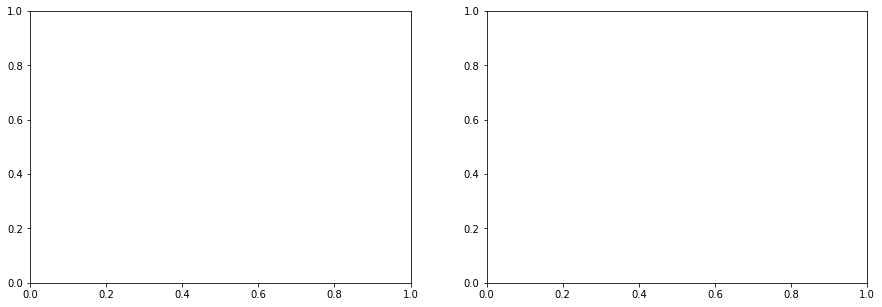

In [52]:
# compute test accuracy
from matplotlib import pyplot as plt

plot_model_history(model_info)
print ("Accuracy on test data is: %0.2f"%accuracy(test_ds, model))

Evaluate Model

In [56]:
# Test the model
model.load_weights('./Assignment16/maxAccuracy.hdf5')
score = model.evaluate(test_ds, verbose=1, steps = np.ceil(10000/BATCH_SIZE))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

OSError: ignored